In [99]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris, load_wine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.neural_network import MLPClassifier

In [100]:
wine = load_wine()

In [101]:
list(wine.target_names)

['class_0', 'class_1', 'class_2']

In [102]:
wine_predictor = pd.DataFrame(wine.data)
wine_target = pd.DataFrame(wine.target)

 ### Take any classification data set and divide it up into a learning set and atest  set.  

In [151]:
predictor_train,predictor_test,target_train,target_test=train_test_split(wine_predictor,wine_target,test_size=0.2)

  ### Change  the  value  of  one  observation on  one  input  variable  in  the learning  set  so  that  the  value  is  now  a  univariate  outlier.    

In [152]:
predictor_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
138,13.49,3.59,2.19,19.5,88.0,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580.0
141,13.36,2.56,2.35,20.0,89.0,1.40,0.50,0.37,0.64,5.60,0.70,2.47,780.0
22,13.71,1.86,2.36,16.6,101.0,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035.0
128,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0
130,12.86,1.35,2.32,18.0,122.0,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630.0


In [153]:
predictor_train.iloc[2,2]

2.36

### Use cross-validation or the hold out method to determine the number of neurons to use in the layer.  Comment on the effect of the outlier on the fit and on its effect on classifying the test set.


In [154]:
rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(rfc, step=1, cv=10,scoring='accuracy') # scoring='accuracy'
rfecv.fit(predictor_train, target_train.values.ravel())
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 9


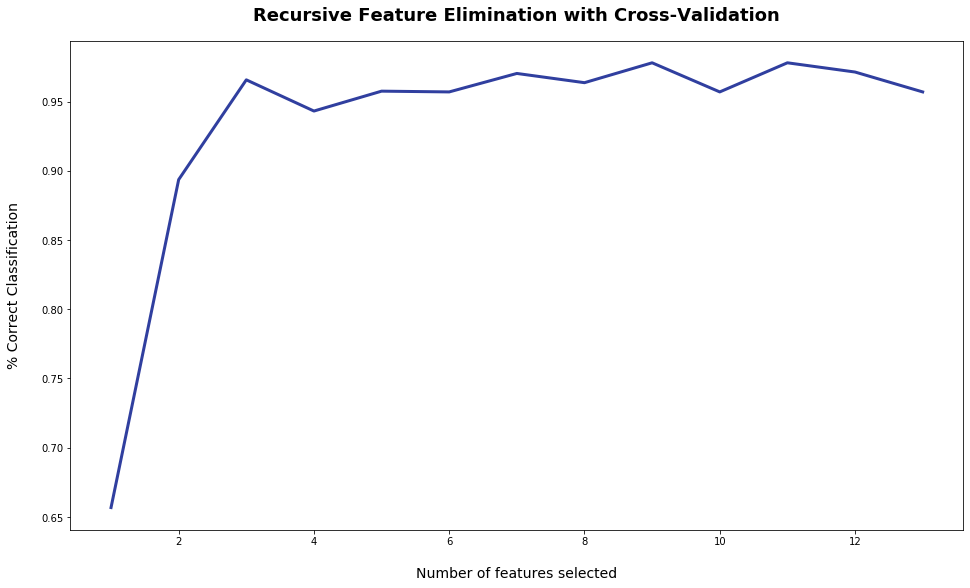

In [213]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)
plt.savefig("Recursive Feature Elimination with Cross-Validation P2.png")
plt.show()

### Fit  separate  single-hidden-layer neural networks to the original learning-set data and to the learning-set data with the outlier.  

In [156]:
# Single Layer
mlp = MLPClassifier(hidden_layer_sizes=(6), max_iter=10000)
mlp_edited = MLPClassifier(hidden_layer_sizes=(6), max_iter=10000)

In [157]:
# Original DataSet 
mlp.fit(predictor_train, target_train.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=6, learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [158]:
# mlp.fit(predictor_train, target_train)
mlp.fit(predictor_train, target_train.values.ravel())
y_prediction = mlp.predict(predictor_test)
print(accuracy_score(target_test, y_prediction))

0.9722222222222222


### The Modified Data

In [159]:
predictor_train_edited = predictor_train

In [160]:
predictor_train_edited.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
138,13.49,3.59,2.19,19.5,88.0,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580.0
141,13.36,2.56,2.35,20.0,89.0,1.40,0.50,0.37,0.64,5.60,0.70,2.47,780.0
22,13.71,1.86,2.36,16.6,101.0,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035.0
128,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0
130,12.86,1.35,2.32,18.0,122.0,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630.0


In [161]:
predictor_train_edited.iloc[2,2] = 99999999999999

In [162]:
#Verify Edits
predictor_train_edited

,0,1,2,3,4,5,6,7,8,9,10,11,12
138,13.49,3.59,2.190000e+00,19.5,88.0,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580.0
141,13.36,2.56,2.350000e+00,20.0,89.0,1.40,0.50,0.37,0.64,5.60,0.70,2.47,780.0
22,13.71,1.86,1.000000e+14,16.6,101.0,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035.0
128,12.37,1.63,2.300000e+00,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0
130,12.86,1.35,2.320000e+00,18.0,122.0,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,13.05,1.65,2.550000e+00,18.0,98.0,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105.0
15,13.63,1.81,2.700000e+00,17.2,112.0,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310.0
28,13.87,1.90,2.800000e+00,19.4,107.0,2.95,2.97,0.37,1.76,4.50,1.25,3.40,915.0
126,12.43,1.53,2.290000e+00,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0


In [165]:
# Modified DataSet  
mlp_edited.fit(predictor_train_edited, target_train.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=6, learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [166]:
mlp_edited.fit(predictor_train_edited, target_train)
y_prediction = mlp_edited.predict(predictor_test)
print(accuracy_score(target_test, y_prediction))

0.6388888888888888


### Shrink the value of that outlier toward  its  original  value  and  evaluate  when  the  effect  of  the  outlier  on  the  fit vanishes.

#### Shrink Stage 1

In [195]:
predictor_train_edited.iloc[2,2] = 99999999

In [196]:
#Verify Edits
predictor_train_edited

,0,1,2,3,4,5,6,7,8,9,10,11,12
138,13.49,3.59,2.19,19.5,88.0,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580.0
141,13.36,2.56,2.35,20.0,89.0,1.40,0.50,0.37,0.64,5.60,0.70,2.47,780.0
22,13.71,1.86,99999999.00,16.6,101.0,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035.0
128,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0
130,12.86,1.35,2.32,18.0,122.0,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,13.05,1.65,2.55,18.0,98.0,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105.0
15,13.63,1.81,2.70,17.2,112.0,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310.0
28,13.87,1.90,2.80,19.4,107.0,2.95,2.97,0.37,1.76,4.50,1.25,3.40,915.0
126,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0


In [197]:
# Modified DataSet  
mlp_edited.fit(predictor_train_edited, target_train.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=6, learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [198]:
mlp_edited.fit(predictor_train_edited, target_train)
y_prediction = mlp_edited.predict(predictor_test)
print(accuracy_score(target_test, y_prediction))

0.6666666666666666


In [199]:
#### Shrink Stage 2

In [200]:
predictor_train_edited.iloc[2,2] = 999

In [201]:
#Verify Edits
predictor_train_edited

,0,1,2,3,4,5,6,7,8,9,10,11,12
138,13.49,3.59,2.19,19.5,88.0,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580.0
141,13.36,2.56,2.35,20.0,89.0,1.40,0.50,0.37,0.64,5.60,0.70,2.47,780.0
22,13.71,1.86,999.00,16.6,101.0,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035.0
128,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0
130,12.86,1.35,2.32,18.0,122.0,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,13.05,1.65,2.55,18.0,98.0,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105.0
15,13.63,1.81,2.70,17.2,112.0,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310.0
28,13.87,1.90,2.80,19.4,107.0,2.95,2.97,0.37,1.76,4.50,1.25,3.40,915.0
126,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0


In [202]:
# Modified DataSet  
mlp_edited.fit(predictor_train_edited, target_train.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=6, learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [207]:
mlp_edited.fit(predictor_train_edited, target_train)
y_prediction = mlp_edited.predict(predictor_test)
print(accuracy_score(target_test, y_prediction))

0.6944444444444444


#### Shrink Stage 3

In [208]:
predictor_train_edited.iloc[2,2] = 9

In [209]:
#Verify Edits
predictor_train_edited

,0,1,2,3,4,5,6,7,8,9,10,11,12
138,13.49,3.59,2.19,19.5,88.0,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580.0
141,13.36,2.56,2.35,20.0,89.0,1.40,0.50,0.37,0.64,5.60,0.70,2.47,780.0
22,13.71,1.86,9.00,16.6,101.0,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035.0
128,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0
130,12.86,1.35,2.32,18.0,122.0,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,13.05,1.65,2.55,18.0,98.0,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105.0
15,13.63,1.81,2.70,17.2,112.0,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310.0
28,13.87,1.90,2.80,19.4,107.0,2.95,2.97,0.37,1.76,4.50,1.25,3.40,915.0
126,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0


In [210]:
# Modified DataSet  
mlp_edited.fit(predictor_train_edited, target_train.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=6, learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [211]:
mlp_edited.fit(predictor_train_edited, target_train)
y_prediction = mlp_edited.predict(predictor_test)
print(accuracy_score(target_test, y_prediction))

0.9722222222222222


--- 
# Deprecated

In [19]:
# cv_levels = 10
# initial_score = 0.9651515151515151
# initial_i = 10
# for i in range(2, cv_levels):
#     score = cross_val_score(mlp, predictor_train, target_train, cv=cv_levels)
#     average_score = sum(score) / cv_levels
#     if  average_score > initial_score:
#         initial_score = average_score
#         initial_i = i

In [20]:
# initial_score

In [21]:
# initial_i

In [22]:
# cv_levels = 10
# initial_score = 0.9651515151515151
# initial_i = 10
# for i in range(2, cv_levels):
#     score = cross_val_score(mlp_edited, predictor_train_edited, target_train, cv=cv_levels)
#     average_score = sum(score) / cv_levels
#     if  average_score > initial_score:
#         initial_score = average_score
#         initial_i = i

In [23]:
# initial_score

In [24]:
# initial_i